In [4]:
pip install git+https://github.com/pgmpy/pgmpy.git

  Cloning https://github.com/pgmpy/pgmpy.git to /tmp/pip-req-build-ov40fn9x
  Running command git clone --filter=blob:none --quiet https://github.com/pgmpy/pgmpy.git /tmp/pip-req-build-ov40fn9x
  Resolved https://github.com/pgmpy/pgmpy.git to commit b8e7f93f36060c587d1ce5c467954d39079f2628
  Running command git submodule update --init --recursive -q
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 98.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 83.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [5]:
import pandas as pd
from pgmpy.models import DiscreteBayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination

In [6]:
df = pd.read_csv('/content/drive/MyDrive/heart_disease.csv')

In [7]:
df = df.drop_duplicates()
df = df.dropna()

In [8]:
df['age'] = pd.cut(df['age'], bins=5, labels=["very_low", "low", "medium", "high", "very_high"])
df['chol'] = pd.cut(df['chol'], bins=3, labels=["low", "medium", "high"])
df['thalach'] = pd.cut(df['thalach'], bins=3, labels=["low", "medium", "high"])
df['fbs'] = df['fbs'].astype(str)

In [9]:
model = DiscreteBayesianNetwork([
    ('age', 'fbs'),
    ('fbs', 'target'),
    ('target', 'chol'),
    ('target', 'thalach')
])

In [10]:
model.fit(df, estimator=MaximumLikelihoodEstimator)

In [11]:
inference = VariableElimination(model)
result = inference.query(variables=["target"], evidence={"age": "medium"})

In [12]:
print(result)

+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.4579 |
+-----------+---------------+
| target(1) |        0.5421 |
+-----------+---------------+


In [13]:
import networkx as nx
import matplotlib.pyplot as plt

In [16]:
G = nx.DiGraph()
G.add_edges_from(model.edges())

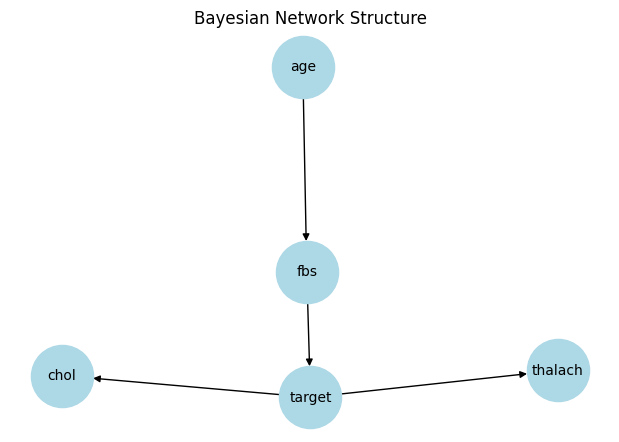

In [17]:
plt.figure(figsize=(6, 4))
nx.draw(G, with_labels=True, node_size=2000, node_color="lightblue", font_size=10, arrows=True)
plt.title("Bayesian Network Structure")
plt.show()